In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Loading the data

In [41]:
train = pd.read_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\train.csv")
test = pd.read_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\test.csv")

## Understanding the data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### From this, we can know that Survived, Pclass, Sex, Sibsp, Parch and Embarked are Categorical data

## Cleaning the data

In [6]:
# Find the missing values
train.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# We are dropping the Cabin section as only 687 out of 891 of data are present in Cabin section
train.drop(columns='Cabin', inplace=True)
test.drop(columns='Cabin', inplace=True)

<AxesSubplot:>

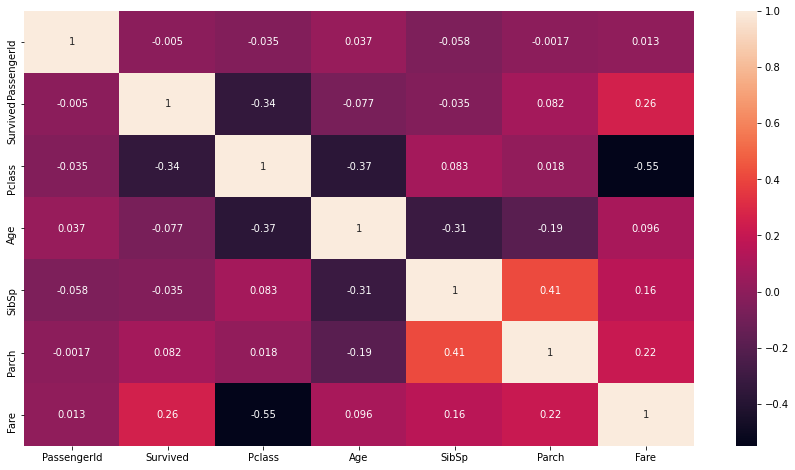

In [9]:
# For Embarked and Age, we will see the correlation matrix and other graphs to determine the na values
cor = train.corr()
plt.figure(figsize=(15,8))
sn.heatmap(cor, annot=True)

### From above matrix, it is evident that age has strong correlation with Pclass(i.e. -0.37). Hence, we will determine the values of missing ages using Pclass

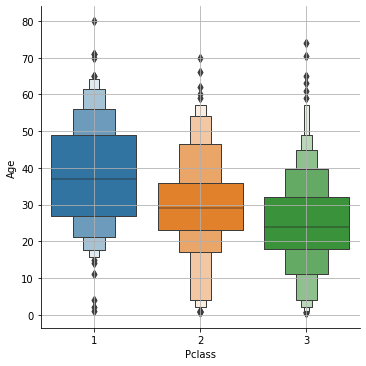

In [10]:
sn.catplot(x='Pclass', y='Age', data=train, kind='boxen')
plt.grid()

#### From above plot, it is evident that the younger people are travelling under Pclass 3 whereas older people are travelling under Pclass1. We will therefore, replace the missing ages as the average value obtained for each Pclass i.e. 38 for Pclass1, 29 for Pclass2 and 24 for Pclass3.

In [11]:
def AgePclass(agepclasslist):
    age = agepclasslist[0]
    pclass = agepclasslist[1]
    if pd.isnull(age):
        if pclass==1:
            return 38

        elif pclass==2:
            return 29

        else:
            return 24
    else:
        return age

train['Age'] = train[['Age','Pclass']].apply(lambda x: AgePclass(x), axis=1)        
test['Age'] = test[['Age','Pclass']].apply(lambda x: AgePclass(x), axis=1)    

In [12]:
train['Age'].isna().sum()

0

<AxesSubplot:>

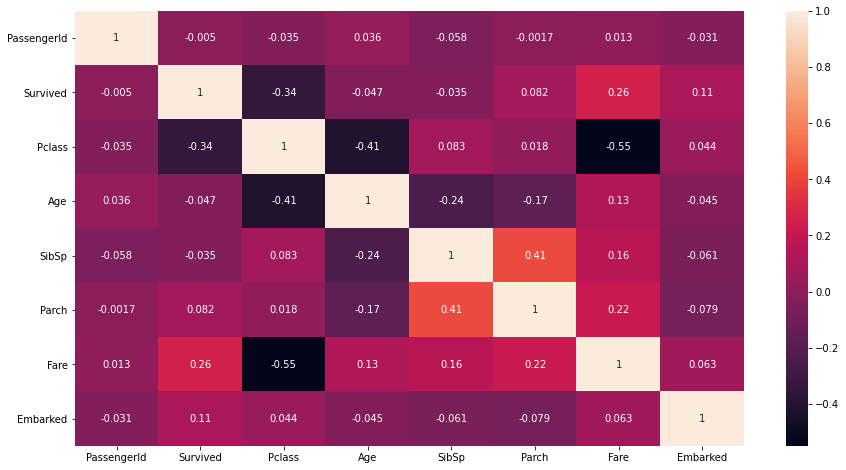

In [13]:
# Lets map the Embarked as 0,1 and 2 for S,C and Q to correlate it with other variables
pd.set_option("display.max_rows", 11)
values = {'S':0, 'C':1, 'Q':2}
train_copy = train.copy()
train_copy['Embarked'] = train_copy['Embarked'].map(values)
plt.figure(figsize=(15,8))
sn.heatmap(train_copy.corr(), annot=True)

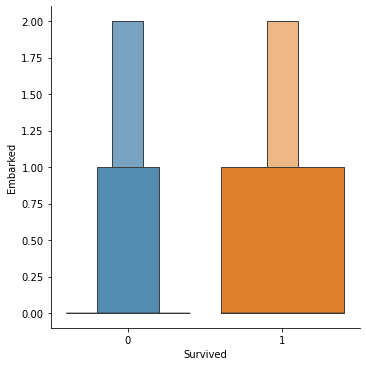

In [14]:
sn.catplot(x='Survived', y='Embarked', data=train_copy, kind='boxen')

#### From the correlation matrix, it is seen that the highest correlation of Embarked is with Survived but its not much, only 0.11. From the catplot it is seen that more people survived in the port S and C which is 0 and 1. Therefore, we will fill the survived empty cell with either S or C and not survived empty cell with Q.

In [15]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [16]:
# Since, both the empty cells of embarked has survived cell 1, we will replace both the Embarked empty cells with S 
train['Embarked'] = train['Embarked'].apply(lambda x: 'S' if pd.isna(x) else x)

In [17]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
test.isna().sum()
print(test[test['Fare'].isna()])
test.groupby(['Pclass']).mean()

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Embarked  
152   NaN        S  


,PassengerId,Age,SibSp,Parch,Fare
Pclass,,,,,
1,1098.224299,40.672897,0.476636,0.383178,94.280297
2,1117.935484,28.789462,0.376344,0.344086,22.202104
3,1094.178899,24.018716,0.463303,0.417431,12.459678


In [19]:
# Since, one fare cell is empty, lets replace it by average values of fare for pclass3 since the empty fare lies in pclass3
test['Fare'] = test['Fare'].apply(lambda x: 12.459678 if pd.isna(x) else x)

In [20]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### All the missing values has been substituted by some values

## Observing the relationship between variables

c:\users\santo\pycharmprojects\webscraping\venv\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


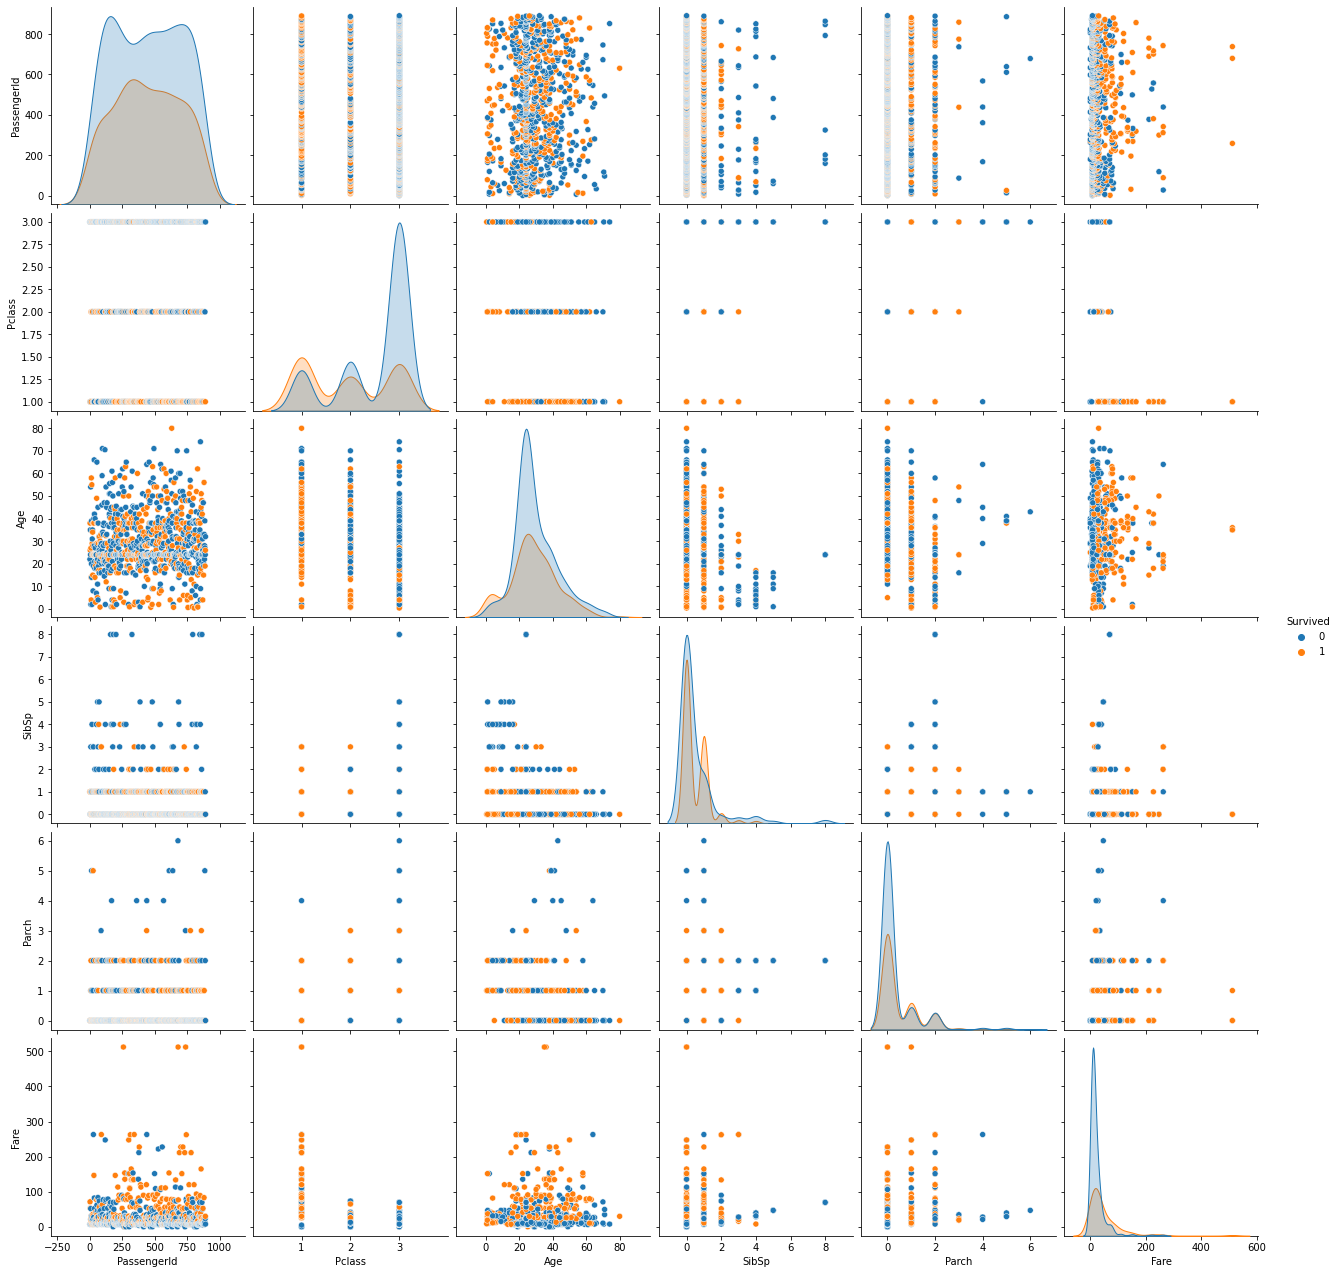

In [21]:
sn.pairplot(train, hue='Survived', size=3)


#### From the above plots, it is seen that passengerid and age are not good for classfication when taken with any features. Hence, we will drop the non-categorical data passengerid and age but will keep fare since it has a good correlation with survived i.e. 0.26.

## Feature Engineering

In [22]:
train.drop(columns=['PassengerId','Age'], inplace=True)
test.drop(columns=['PassengerId','Age'], inplace=True)

In [23]:
test

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,S


#### Lets select the title from name and ticket prefix from ticket to evaluate further

In [24]:
def nameselect(x):
    a = x.split(" ")
    for i in range(len(a)):
        if a[i][-1]==',':
            if a[i+1][-1] == '.':
                return a[i+1] 
            else:
                return a[i+1]+" "+a[i+2]

def ticketselect(x):
    a = x.split(" ")
    if len(a)>1:
        return a[0]
    else:
        return x
    
train['Name_title'] = train['Name'].apply(lambda x: nameselect(x))
train['Ticket_prefix'] = train['Ticket'].apply(lambda x: ticketselect(x))

In [25]:
train['Name_title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'the Countess.', 'Jonkheer.'], dtype=object)

#### Since, Mrs., Miss., and Lady. come under female and rest mainly males and since, there is sex category for that purpose, we can drop both name and name_title. Also, since ticket_prefix is non-categorical in nature and we have fare to describe the ticket itself, we can drop the ticket and ticket_prefix column as well.

In [26]:
train.drop(columns=['Name', 'Name_title', 'Ticket', 'Ticket_prefix'], inplace=True)
test.drop(columns=['Name', 'Ticket'], inplace=True)

In [27]:
train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S
887,1,1,female,0,0,30.0000,S
888,0,3,female,1,2,23.4500,S
889,1,1,male,0,0,30.0000,C


In [28]:
# Now, we will represent sex and embarked as one hot encoder while dropping the first column to decrease the number of features
sex_train = pd.get_dummies(train['Sex'], drop_first=True)
embarked_train = pd.get_dummies(train['Embarked'], drop_first=True)
sex_test = pd.get_dummies(test['Sex'], drop_first=True)
embarked_test = pd.get_dummies(test['Embarked'], drop_first=True)

In [29]:
train = pd.concat([train, sex_train, embarked_train], axis=1)
test = pd.concat([test, sex_test, embarked_test], axis=1)
train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,1,0,7.2500,S,1,0,1
1,1,1,female,1,0,71.2833,C,0,0,0
2,1,3,female,0,0,7.9250,S,0,0,1
3,1,1,female,1,0,53.1000,S,0,0,1
4,0,3,male,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,1,0,1
887,1,1,female,0,0,30.0000,S,0,0,1
888,0,3,female,1,2,23.4500,S,0,0,1
889,1,1,male,0,0,30.0000,C,1,0,0


In [30]:
# Dropping the sex and embarked columns
train.drop(columns=['Sex','Embarked'], inplace=True)
test.drop(columns=['Sex','Embarked'], inplace=True)
train

,Survived,Pclass,SibSp,Parch,Fare,male,Q,S
0,0,3,1,0,7.2500,1,0,1
1,1,1,1,0,71.2833,0,0,0
2,1,3,0,0,7.9250,0,0,1
3,1,1,1,0,53.1000,0,0,1
4,0,3,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1,0,1
887,1,1,0,0,30.0000,0,0,1
888,0,3,1,2,23.4500,0,0,1
889,1,1,0,0,30.0000,1,0,0


In [31]:
# Saving our new train and test data
train.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\kaggle_new_traindata.csv", index=False)
test.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\kaggle_new_testdata.csv", index=False)

In [32]:
# Loading from the new model
train = pd.read_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\kaggle_new_traindata.csv")
test1 = pd.read_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\kaggle_new_testdata.csv")

## Now we are ready to model our data

In [33]:
y = train['Survived']
x = train.drop(columns=['Survived'])
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(train_x, train_y)
log.score(test_x, test_y)

c:\users\santo\pycharmprojects\webscraping\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.770949720670391

In [35]:
from sklearn.svm import SVC
svm = SVC(C=1, kernel='linear')
svm.fit(train_x, train_y)
svm.score(test_x, test_y)

0.7821229050279329

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, train_y)
gnb.score(test_x, test_y)
df_result = pd.DataFrame(test['PassengerId']) # This test is again taken from the original data
df_result['Survived'] = gnb.predict(test1)
df_result.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\result12.csv", index=False)
# Score is 0.75598

0.776536312849162

In [42]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(ccp_alpha=0.0024)
dec.fit(train_x, train_y)
dec.score(test_x, test_y)
df_result = pd.DataFrame(test['PassengerId'])
df_result['Survived'] = dec.predict(test1)
df_result.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\result14.csv", index=False)
# Score is 0.77511

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(train_x, train_y)
knc.score(test_x, test_y)
df_result = pd.DataFrame(test['PassengerId'])
df_result['Survived'] = knc.predict(test1)
df_result.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\result11.csv", index=False)
Score is 0.70334

0.8100558659217877

In [39]:
# The highest score obtained is 0.77511 from Kaggle's